# Loading the model

In [82]:
from keras.models import load_model
import cv2
import numpy as np
import math
import json
from keras.models import model_from_json
# import the necessary packages
from imutils.perspective import four_point_transform
from imutils import contours
import imutils
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)


loaded_model.load_weights('model.h5')

model = loaded_model


print('Model successfully loaded')

Model successfully loaded


# Word Classification

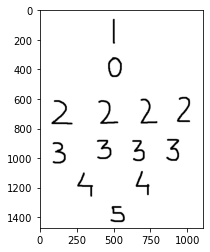

In [83]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

characters = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']


#enter input image here
image = cv2.imread('photo6.jpg')
plt.imshow(image)

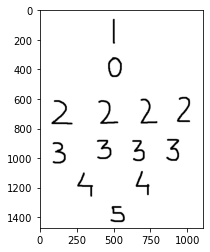

In [84]:
# convert to RGB
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

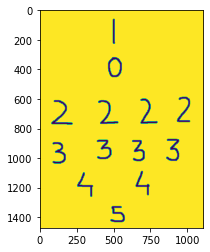

In [85]:
# convert to grayscale
gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)

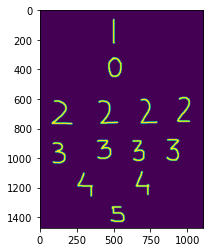

In [86]:
# create a binary thresholded image
_, binary = cv2.threshold(gray, 177, 255, cv2.THRESH_BINARY_INV)
# show it
plt.imshow(binary)

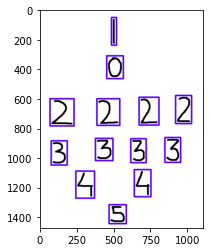

In [87]:
#find contours
ctrs, hier = cv2.findContours(binary.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

m = list()
#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
pchl = list()
dp = image.copy()
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    cv2.rectangle(dp,(x-10,y-10),( x + w + 10, y + h + 10 ),(90,0,255),9)
    
plt.imshow(dp)

In [88]:
oracle = []
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    # Getting ROI
    roi = image[y-10:y+h+10, x-10:x+w+10]
    roi = cv2.resize(roi, dsize=(28,28), interpolation=cv2.INTER_CUBIC)
    roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
    
    roi = np.array(roi)
    t = np.copy(roi)
    t = t / 255.0
    t = 1-t
    t = t.reshape(1,784)
    pred = model.predict_classes(t)
    cv2.putText(image, str(int(pred[0])), (x-10,y-10),cv2.FONT_HERSHEY_DUPLEX, 2, (90,0,255),9)
    oracle.append([str(int(pred[0])), np.array([x-10,y-10])])


In [89]:
alsoOracle = oracle
oracle = np.array(oracle)

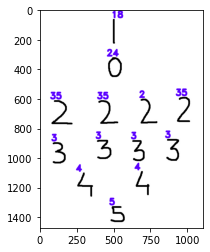

In [97]:

# Get the distance of unit
split = (7,7)

unit_X = np.shape(image)[0] / split[0]
unit_Y = np.shape(image)[1] / split[1]

# Get the row ID and return in data

data = []
for instance in oracle:
    row = math.floor(instance[1][1] / unit_X)
    data.append([instance[0], row])
data = np.array(data)

# Get the set of rowID

index_full = set(data[:, 1])

# Calculate the number of shapes in the same row

post = []
for index in index_full:
    sum = 0
    for i in range(0, len(data)):
        if data[i, 1] == index:
            sum += 1
    post.append([index, sum])
post = np.array(post)

# add the row which specifies the number of shape in the same rows

data = np.hstack((data, np.zeros((np.shape(data)[0], 1))))
for i in range(0, np.shape(post)[0]):
    for j in range(0, np.shape(data)[0]):
        if post[i, 0] == data[j, 1]:
            data[j, 2] = post[i, 1]

# return json file to process in json
# ["Type of number", "RowID", "number of shape in the same row"]
data = data.tolist()
results = sorted(data,key=lambda x: int(x[1]))
plt.imshow(image)

In [98]:
print(results)

[['18', '0', '1'], ['24', '1', '1'], ['35', '2', '4'], ['35', '2', '4'], ['2', '2', '4'], ['35', '2', '4'], ['3', '4', '4'], ['3', '4', '4'], ['3', '4', '4'], ['3', '4', '4'], ['4', '5', '2'], ['4', '5', '2'], ['5', '6', '1']]
